This is the start of project 1: This project will take the input data of different muscle sensors to predict 4 different hand positions. This data is retrieved from kraggle, later on data will be grabbed from actual muscle sensros in lab, right now however the ablity to redord motions and values has not been implemented.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.client import device_lib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
from sklearn.metrics import classification_report

maxEpoch = 100 #making this a global variable because this way i can change all runs faster

2022-10-17 13:03:13.589686: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 13:03:14.046130: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-17 13:03:15.239404: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/nate/anaconda3/lib/
2022-10-17 13:03:15.239553: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: can

The block of code holds all the pandas related stuff, the next section will handle converting the pandas dataframe to a numpy array and processing (normalizing the data)

Gesture classes were : rock - 0, scissors - 1, paper - 2, ok - 3. 

In [2]:

# this section of code was harder to solve than orgianally expected, as the contac did not let me use some of the function that i needed to use, 
# To solve this i had to make a new csv, and then drop a extra row that was added in the process, after that everything seemed to fall into place.
cols = [                                                    
'm1s1','m1s2','m1s3','m1s4','m1s5','m1s6','m1s7','m1s8',
'm2s1','m2s2','m2s3','m2s4','m2s5','m2s6','m2s7','m2s8',
'm3s1','m3s2','m3s3','m3s4','m3s5','m3s6','m3s7','m3s8',
'm4s1','m4s2','m4s3','m4s4','m4s5','m4s6','m4s7','m4s8',
'm5s1','m5s2','m5s3','m5s4','m5s5','m5s6','m5s7','m5s8',
'm6s1','m6s2','m6s3','m6s4','m6s5','m6s6','m6s7','m6s8',
'm7s1','m7s2','m7s3','m7s4','m7s5','m7s6','m7s7','m7s8',
'm8s1','m8s2','m8s3','m8s4','m8s5','m8s6','m8s7','m8s8','gesture']          #differnt column labels, m=muscle, s=sensor so m1s1 is muscle 1 sensor 1, and continues so on
df0 = pd.read_csv('archive1/0.csv')   #grab the data from csv0
df1 = pd.read_csv('archive1/1.csv')   #grab the data from csv1
df2 = pd.read_csv('archive1/2.csv')   #grab the data from csv2
df3 = pd.read_csv('archive1/3.csv')   #grab the data from csv3
df0.columns = cols #set up the columns
df1.columns = cols #set up the columns
df2.columns = cols #set up the columns
df3.columns = cols #set up the columns


frames = [df0, df1, df2, df3] #put all the frames in a list
temp = pd.concat(frames) #combine all the frames into one dataframe
temp.to_csv("input.csv") #write this new dataframe into a csv so that it can be processed better
dataframe = pd.read_csv("input.csv") #read the new csv back into the program



dataframe.drop( columns=dataframe.columns[0], axis=1,inplace=True) #the procesign of writing the other csvs into a big one, added the number column which was wrong so here we drop it
display(dataframe) #show a sample of the data

dataframe = dataframe.sample(frac=1)  #this is to scramble the data a little bit otherwise there would just be big chunks of the same class right next to each other.


display(dataframe)


,m1s1,m1s2,m1s3,m1s4,m1s5,m1s6,m1s7,m1s8,m2s1,m2s2,...,m7s8,m8s1,m8s2,m8s3,m8s4,m8s5,m8s6,m8s7,m8s8,gesture
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11669,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11670,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11671,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11672,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


,m1s1,m1s2,m1s3,m1s4,m1s5,m1s6,m1s7,m1s8,m2s1,m2s2,...,m7s8,m8s1,m8s2,m8s3,m8s4,m8s5,m8s6,m8s7,m8s8,gesture
10783,-4.0,2.0,2.0,1.0,9.0,5.0,4.0,4.0,-10.0,-8.0,...,-29.0,0.0,-4.0,-2.0,-4.0,-6.0,-57.0,-4.0,31.0,3
11407,-9.0,-4.0,-4.0,-6.0,-4.0,-21.0,-9.0,-7.0,0.0,-1.0,...,-1.0,3.0,0.0,0.0,-4.0,1.0,-15.0,1.0,6.0,3
5517,-15.0,-1.0,1.0,6.0,6.0,-4.0,0.0,6.0,-11.0,-9.0,...,-2.0,4.0,1.0,0.0,6.0,17.0,23.0,4.0,7.0,1
3373,-12.0,-13.0,-4.0,-4.0,37.0,41.0,2.0,-4.0,-20.0,4.0,...,0.0,-13.0,-3.0,-2.0,-2.0,-27.0,-28.0,3.0,3.0,1
5269,-11.0,-2.0,0.0,0.0,-45.0,-12.0,-5.0,-7.0,15.0,0.0,...,2.0,-2.0,-2.0,-1.0,4.0,-27.0,0.0,-1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,10.0,10.0,-2.0,0.0,-10.0,-8.0,-35.0,-18.0,-26.0,7.0,...,-34.0,-17.0,23.0,7.0,8.0,14.0,1.0,25.0,2.0,0
5481,-12.0,-5.0,0.0,4.0,28.0,16.0,1.0,-8.0,2.0,-3.0,...,9.0,-9.0,-7.0,-1.0,-1.0,-24.0,-9.0,-7.0,-19.0,1
9810,19.0,12.0,4.0,6.0,2.0,-1.0,6.0,-19.0,6.0,-11.0,...,-14.0,-24.0,2.0,3.0,-11.0,66.0,86.0,17.0,-7.0,3
1332,2.0,23.0,9.0,-1.0,-4.0,2.0,-14.0,4.0,-72.0,-12.0,...,3.0,1.0,-1.0,-5.0,-4.0,38.0,-10.0,8.0,-9.0,0


# Beginning of data processing



As mentioned in the comments, the second table is the same data but scrambled so that the would not be continous blocks of the same class. The reason that is needed is because if the data was not scrambled the model might have signifigantly more of one class than the other, this helps to combat that a little bit.

Next I am going to split the data into test train and val sets by using 2 iterations of train test split to get a distribution at the end of 40-20-20 for my train val and test sets.


In [27]:
from sklearn.model_selection import train_test_split
display(dataframe)

allX = dataframe.loc[:, dataframe.columns != "gesture"]
allY = dataframe["gesture"]


trainX, testX, trainY, testY = train_test_split(allX, allY, test_size=.4, random_state=1)  #grab all of the data and put 40% of it into the test sets
valX, testX, valY, testY, = train_test_split(testX, testY, test_size=.5, random_state=1)   #then from the test data spilt that in half for the test and val sets.




trainY = to_categorical(trainY)   #congigure all of the y inputs into 1 hots form ie class 0 would be more like [0,0,0,1] one would be [0,0,1,0] and so on
testY = to_categorical(testY)
valY = to_categorical(valY)


print(trainX.shape, " ", valX.shape, " ", testX.shape)  #confirm shapes




labelNames = ['Rock', 'Paper', 'Scissors', 'Ok'] #what the classes are


#The data is first split in what will be training and validation, and testing.


,m1s1,m1s2,m1s3,m1s4,m1s5,m1s6,m1s7,m1s8,m2s1,m2s2,...,m7s8,m8s1,m8s2,m8s3,m8s4,m8s5,m8s6,m8s7,m8s8,gesture
10783,-4.0,2.0,2.0,1.0,9.0,5.0,4.0,4.0,-10.0,-8.0,...,-29.0,0.0,-4.0,-2.0,-4.0,-6.0,-57.0,-4.0,31.0,3
11407,-9.0,-4.0,-4.0,-6.0,-4.0,-21.0,-9.0,-7.0,0.0,-1.0,...,-1.0,3.0,0.0,0.0,-4.0,1.0,-15.0,1.0,6.0,3
5517,-15.0,-1.0,1.0,6.0,6.0,-4.0,0.0,6.0,-11.0,-9.0,...,-2.0,4.0,1.0,0.0,6.0,17.0,23.0,4.0,7.0,1
3373,-12.0,-13.0,-4.0,-4.0,37.0,41.0,2.0,-4.0,-20.0,4.0,...,0.0,-13.0,-3.0,-2.0,-2.0,-27.0,-28.0,3.0,3.0,1
5269,-11.0,-2.0,0.0,0.0,-45.0,-12.0,-5.0,-7.0,15.0,0.0,...,2.0,-2.0,-2.0,-1.0,4.0,-27.0,0.0,-1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,10.0,10.0,-2.0,0.0,-10.0,-8.0,-35.0,-18.0,-26.0,7.0,...,-34.0,-17.0,23.0,7.0,8.0,14.0,1.0,25.0,2.0,0
5481,-12.0,-5.0,0.0,4.0,28.0,16.0,1.0,-8.0,2.0,-3.0,...,9.0,-9.0,-7.0,-1.0,-1.0,-24.0,-9.0,-7.0,-19.0,1
9810,19.0,12.0,4.0,6.0,2.0,-1.0,6.0,-19.0,6.0,-11.0,...,-14.0,-24.0,2.0,3.0,-11.0,66.0,86.0,17.0,-7.0,3
1332,2.0,23.0,9.0,-1.0,-4.0,2.0,-14.0,4.0,-72.0,-12.0,...,3.0,1.0,-1.0,-5.0,-4.0,38.0,-10.0,8.0,-9.0,0


(7004, 64)   (2335, 64)   (2335, 64)


Next just to see how the data is without doing anything I am going to run relu on it just to see how much work needs to go into this data to make it useful.

2022-10-17 13:03:18.447184: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 13:03:18.477543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 13:03:18.477941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 13:03:18.478698: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/100
 51/219 [=====>........................] - ETA: 0s - loss: 2.9253 - accuracy: 0.4222

2022-10-17 13:03:22.517508: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


219/219 [==============================] - 3s 5ms/step - loss: 1.4165 - accuracy: 0.6339 - val_loss: 0.7530 - val_accuracy: 0.7559
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.3768 - accuracy: 0.8624 - val_loss: 0.5876 - val_accuracy: 0.8158
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1992 - accuracy: 0.9302 - val_loss: 0.5420 - val_accuracy: 0.8347
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0998 - accuracy: 0.9704 - val_loss: 0.4860 - val_accuracy: 0.8608
Epoch 5/100
219/219 [==============================] - 1s 5ms/step - loss: 0.0643 - accuracy: 0.9814 - val_loss: 0.4743 - val_accuracy: 0.8647
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0359 - accuracy: 0.9934 - val_loss: 0.4873 - val_accuracy: 0.8690
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0192 - accuracy: 0.9984 - val_loss: 0.4796 - val_accuracy: 0.8779
Epoch 8/100

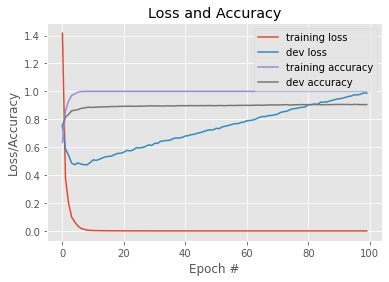

In [4]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
# maxEpoch = 300
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()



The orginal data from this is already very usable for the network and does not need that much to be done to it. The main Issue this model will suffer from is the size of the network I choser for this test. As it is plan to see, becuase of the size the network is overfitting alot. First I am going to normalize the data, then the next step is to start making some choices to improve the model.


In [28]:
from sklearn import preprocessing
#bound the data between -1, and 1 in order to maintain most of the datas information.
print(trainX.shape)
trainX = preprocessing.normalize(trainX)
testX = preprocessing.normalize(testX)
valX = preprocessing.normalize(valX)

print(trainX.min(), trainX.max())

(7004, 64)
-0.8125616347431192 0.8603724002114839


# Data Processing over
The data is now Normalzied between -1 and 1 to preserver most of the datas, information.

# Time to start deciding on a activation function
Next on the docket is to decide on which activation function we are going to focus on for this network. First lets run relu again

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 1.0323 - accuracy: 0.5938 - val_loss: 0.6290 - val_accuracy: 0.7880
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.3926 - accuracy: 0.8708 - val_loss: 0.2930 - val_accuracy: 0.8985
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1998 - accuracy: 0.9343 - val_loss: 0.2203 - val_accuracy: 0.9191
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1252 - accuracy: 0.9630 - val_loss: 0.1951 - val_accuracy: 0.9272
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0913 - accuracy: 0.9727 - val_loss: 0.1864 - val_accuracy: 0.9345
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0647 - accuracy: 0.9826 - val_loss: 0.1949 - val_accuracy: 0.9281
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0449 - accuracy: 0.9897 - val_loss: 0.1895 - val_accuracy: 0.9332

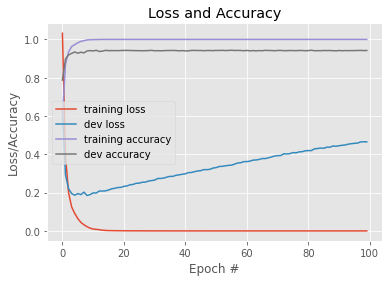

In [6]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 300
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

alright here we got some amazing results, the normalization dramatically increased the accuracy and decreased the loss. Although everything was shifted in the right direction, the dev loss is still bad, and the model still suffers from overfitting. Things are progressing nicely. Next up, I will try the same thing again but this time with a sigmoid function. The reason for this is to see if that function can better handle the overfittiing.

Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 1.4051 - accuracy: 0.2494 - val_loss: 1.4015 - val_accuracy: 0.2493
Epoch 2/100
219/219 [==============================] - 1s 5ms/step - loss: 1.3993 - accuracy: 0.2549 - val_loss: 1.4233 - val_accuracy: 0.2510
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3962 - accuracy: 0.2633 - val_loss: 1.3958 - val_accuracy: 0.2463
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 1.3924 - accuracy: 0.2700 - val_loss: 1.4085 - val_accuracy: 0.2488
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3863 - accuracy: 0.2723 - val_loss: 1.3877 - val_accuracy: 0.2672
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3857 - accuracy: 0.2716 - val_loss: 1.3968 - val_accuracy: 0.2702
Epoch 7/100
219/219 [==============================] - 1s 5ms/step - loss: 1.3842 - accuracy: 0.2870 - val_loss: 1.3851 - val_accuracy: 0.3006

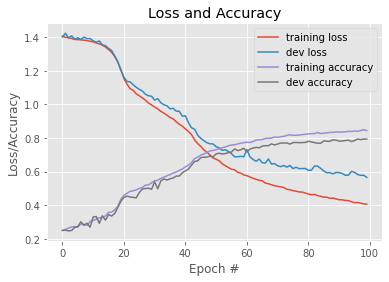

In [7]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Okay so this is interesting, although the accuracy is overall worse, the amount of over fitting is less. Next up I am going to see how tanh functions. The reason for this is that tanh is between -1 - 1 where sigmoid is only 0-1. Being I have negitive input that means that means that tanh might work better

Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 1.3930 - accuracy: 0.3031 - val_loss: 1.3744 - val_accuracy: 0.3238
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3725 - accuracy: 0.3311 - val_loss: 1.3727 - val_accuracy: 0.3310
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3664 - accuracy: 0.3428 - val_loss: 1.3634 - val_accuracy: 0.3203
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3632 - accuracy: 0.3379 - val_loss: 1.3601 - val_accuracy: 0.3323
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3602 - accuracy: 0.3432 - val_loss: 1.3616 - val_accuracy: 0.3537
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3582 - accuracy: 0.3509 - val_loss: 1.3610 - val_accuracy: 0.3418
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3572 - accuracy: 0.3484 - val_loss: 1.3589 - val_accuracy: 0.3400

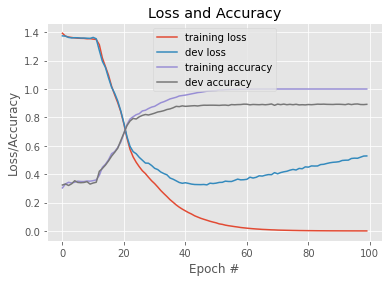

In [8]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'tanh'))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright so looking at this, while tanh had better accuracy, the problem in over fitting is  worse than relu's. The project a such will focus on sigmoid, and try to reduce the overfitting and boot the accuracy even more

being over fitting can be caused by network size, I will reduce the size of the network to 128 and 64

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 1.3948 - accuracy: 0.2651 - val_loss: 1.3878 - val_accuracy: 0.2475
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3899 - accuracy: 0.2536 - val_loss: 1.3941 - val_accuracy: 0.2510
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3919 - accuracy: 0.2519 - val_loss: 1.3902 - val_accuracy: 0.2467
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3881 - accuracy: 0.2590 - val_loss: 1.3875 - val_accuracy: 0.2582
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3872 - accuracy: 0.2800 - val_loss: 1.3852 - val_accuracy: 0.2600
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3853 - accuracy: 0.2783 - val_loss: 1.3870 - val_accuracy: 0.2664
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3827 - accuracy: 0.2841 - val_loss: 1.3950 - val_accuracy: 0.2737

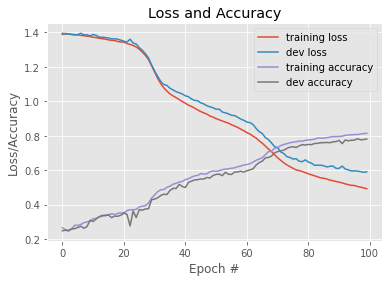

In [9]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(128, input_shape = (64,), activation = 'sigmoid'))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright lets compare both of the sigmoid models that we have created(note this may be differnt from results because these images were grabbed from early run)(images must be in same path or folder as the project)



Large network:  Small network:


![largesig](sigL.png "large Network:") ![smallsig](sigS.png "Small Network:")






Alright so looking that these two graphs, the left graph is the larger sigmoid network, and the right side is the smaller network. As we can see decreasing the size of this model was a very good thing for us as while we lost a small amount of accuracy, we decreased the overfitting. Nextup I want to add an addional layer, this will increase the overfitting which is why I will also add some dropout layers in an attempt to combat this issue.

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 1.4013 - accuracy: 0.2551 - val_loss: 1.4028 - val_accuracy: 0.2527
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3918 - accuracy: 0.2638 - val_loss: 1.3897 - val_accuracy: 0.2527
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3921 - accuracy: 0.2501 - val_loss: 1.3895 - val_accuracy: 0.2488
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3910 - accuracy: 0.2524 - val_loss: 1.3871 - val_accuracy: 0.2527
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3914 - accuracy: 0.2491 - val_loss: 1.3879 - val_accuracy: 0.2484
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3909 - accuracy: 0.2597 - val_loss: 1.3878 - val_accuracy: 0.2527
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3895 - accuracy: 0.2627 - val_loss: 1.3880 - val_accuracy: 0.2685

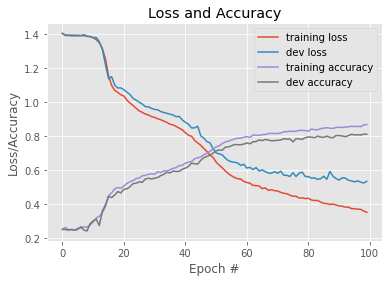

In [10]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 150
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright so we got a slight increase in accuracy, but the over fitting is basically back where everything started from.


alright so we have a decreasing loss, so now I want to see if a larger number of epochs will give a different view as to what is happening with this code

Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 1.3996 - accuracy: 0.2454 - val_loss: 1.3936 - val_accuracy: 0.2475
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3920 - accuracy: 0.2549 - val_loss: 1.3886 - val_accuracy: 0.2475
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3937 - accuracy: 0.2546 - val_loss: 1.3878 - val_accuracy: 0.2527
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3900 - accuracy: 0.2554 - val_loss: 1.3931 - val_accuracy: 0.2475
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3907 - accuracy: 0.2566 - val_loss: 1.3899 - val_accuracy: 0.2488
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3897 - accuracy: 0.2533 - val_loss: 1.3936 - val_accuracy: 0.2488
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3884 - accuracy: 0.2589 - val_loss: 1.3865 - val_accuracy: 0.2480

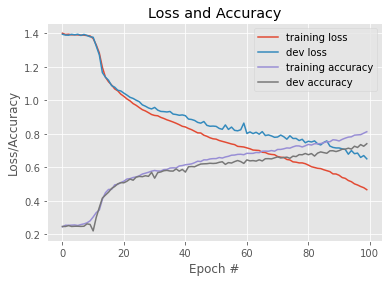

In [11]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch =300
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright, so more epochs did increase the accuracy of the model. However the accuracy's plateaus at around 135 epochs. This is the best number of epochs to run at right now so 150 will be the new number of epochs we will run while training.

Epoch 1/180
219/219 [==============================] - 2s 6ms/step - loss: 1.4012 - accuracy: 0.2469 - val_loss: 1.4004 - val_accuracy: 0.2527
Epoch 2/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3949 - accuracy: 0.2477 - val_loss: 1.3871 - val_accuracy: 0.2488
Epoch 3/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3916 - accuracy: 0.2476 - val_loss: 1.3864 - val_accuracy: 0.2510
Epoch 4/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3907 - accuracy: 0.2513 - val_loss: 1.3870 - val_accuracy: 0.2488
Epoch 5/180
219/219 [==============================] - 1s 5ms/step - loss: 1.3908 - accuracy: 0.2461 - val_loss: 1.3901 - val_accuracy: 0.2634
Epoch 6/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3905 - accuracy: 0.2547 - val_loss: 1.3864 - val_accuracy: 0.2527
Epoch 7/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3883 - accuracy: 0.2594 - val_loss: 1.3874 - val_accuracy: 0.2510

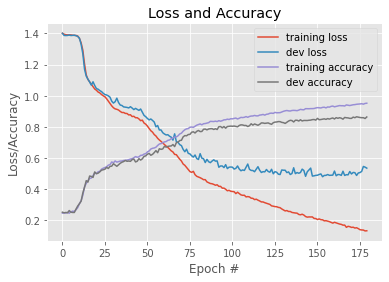

In [12]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright that got us up to about 87 accuracy, which is really good. however we are now once again over fitting our data. However our overfitting is not too extreme, so I wager that our data is not the problem. The next apporach I am going to show is regularzation. In this I imagine that l1 is not going to help much as all features should be important in determining what hand position maps to what imput



Epoch 1/180
219/219 [==============================] - 2s 6ms/step - loss: 9.9800 - accuracy: 0.2469 - val_loss: 1.4624 - val_accuracy: 0.2527
Epoch 2/180
219/219 [==============================] - 1s 5ms/step - loss: 1.4616 - accuracy: 0.2563 - val_loss: 1.4598 - val_accuracy: 0.2527
Epoch 3/180
219/219 [==============================] - 1s 5ms/step - loss: 1.4627 - accuracy: 0.2431 - val_loss: 1.4589 - val_accuracy: 0.2527
Epoch 4/180
219/219 [==============================] - 1s 5ms/step - loss: 1.4605 - accuracy: 0.2523 - val_loss: 1.4602 - val_accuracy: 0.2527
Epoch 5/180
219/219 [==============================] - 1s 5ms/step - loss: 1.4601 - accuracy: 0.2673 - val_loss: 1.4618 - val_accuracy: 0.2475
Epoch 6/180
219/219 [==============================] - 1s 5ms/step - loss: 1.4627 - accuracy: 0.2471 - val_loss: 1.4557 - val_accuracy: 0.2475
Epoch 7/180
219/219 [==============================] - 1s 5ms/step - loss: 1.4631 - accuracy: 0.2454 - val_loss: 1.4568 - val_accuracy: 0.2527

/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


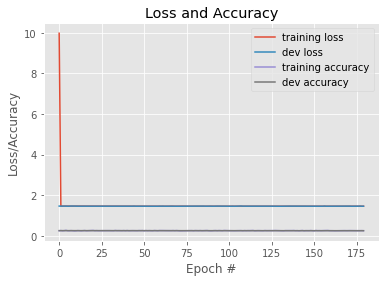

In [13]:


# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
reg = l1_l2(l1 = 0.01, l2 = 0.000)
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

As Expected L1 regularzation is not a good thing for this model, Interestingly neither is L2 after running numerous tests the both give a accuracy of 24%

Epoch 1/180
219/219 [==============================] - 2s 6ms/step - loss: 1.4047 - accuracy: 0.2457 - val_loss: 1.3915 - val_accuracy: 0.2527
Epoch 2/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3945 - accuracy: 0.2554 - val_loss: 1.3871 - val_accuracy: 0.2475
Epoch 3/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3907 - accuracy: 0.2551 - val_loss: 1.3932 - val_accuracy: 0.2527
Epoch 4/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3913 - accuracy: 0.2503 - val_loss: 1.3875 - val_accuracy: 0.2544
Epoch 5/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3899 - accuracy: 0.2579 - val_loss: 1.3861 - val_accuracy: 0.2510
Epoch 6/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3891 - accuracy: 0.2584 - val_loss: 1.3873 - val_accuracy: 0.2544
Epoch 7/180
219/219 [==============================] - 1s 5ms/step - loss: 1.3891 - accuracy: 0.2631 - val_loss: 1.3928 - val_accuracy: 0.2587

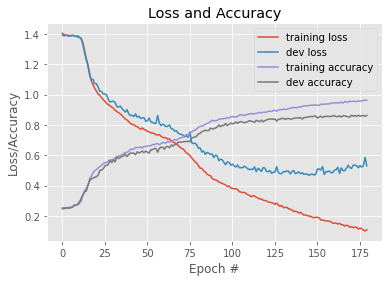

In [14]:


# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
reg = l1_l2(l1 = 0.00, l2 = 0.000000000001)
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright so these test show that l1 and l2 are both not good things for our model. More tests were run than shown but it all very conclusive evidence



Alright so far we have only really touched pure sigmoid functions. We know that relu give us a high accuracy, but also a high amount of over fitting. Sigmoid does not have the issue with overfitting. Next I will try to take advantage of this by mixing relu and sigmoid and seeing how everything turns out. We will start with 2 sigmoid layers and then a relu layer. I am running a massive amount of epochs so that all behavior will be seen from theses test, we will select a more apporiate epoch count later

Epoch 1/500
219/219 [==============================] - 2s 7ms/step - loss: 1.4011 - accuracy: 0.2553 - val_loss: 1.3956 - val_accuracy: 0.2527
Epoch 2/500
219/219 [==============================] - 1s 5ms/step - loss: 1.3934 - accuracy: 0.2464 - val_loss: 1.3877 - val_accuracy: 0.2527
Epoch 3/500
219/219 [==============================] - 1s 4ms/step - loss: 1.3878 - accuracy: 0.2574 - val_loss: 1.3900 - val_accuracy: 0.2510
Epoch 4/500
219/219 [==============================] - 1s 4ms/step - loss: 1.3875 - accuracy: 0.2594 - val_loss: 1.3872 - val_accuracy: 0.2510
Epoch 5/500
219/219 [==============================] - 1s 4ms/step - loss: 1.3873 - accuracy: 0.2594 - val_loss: 1.3869 - val_accuracy: 0.2527
Epoch 6/500
219/219 [==============================] - 1s 5ms/step - loss: 1.3865 - accuracy: 0.2584 - val_loss: 1.3897 - val_accuracy: 0.2552
Epoch 7/500
219/219 [==============================] - 1s 4ms/step - loss: 1.3862 - accuracy: 0.2593 - val_loss: 1.3860 - val_accuracy: 0.2685

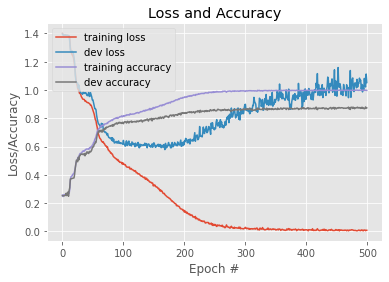

In [15]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =500

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

!["acc"](ssr.png)








Alright so as we can see here, jsut one layer of relu at the end did not give any signifigant boost to accuracy, but instead wildly increased the overfitting of the model. Seeing as how that is the case, sigmoid seems to overfit less so next I will try the opppisite case of 2 layser of relu to 1 sigmoid.

Epoch 1/500
219/219 [==============================] - 2s 5ms/step - loss: 1.0529 - accuracy: 0.5123 - val_loss: 0.7029 - val_accuracy: 0.6998
Epoch 2/500
219/219 [==============================] - 1s 4ms/step - loss: 0.4989 - accuracy: 0.8047 - val_loss: 0.3986 - val_accuracy: 0.8420
Epoch 3/500
219/219 [==============================] - 1s 4ms/step - loss: 0.2520 - accuracy: 0.9106 - val_loss: 0.2497 - val_accuracy: 0.9096
Epoch 4/500
219/219 [==============================] - 1s 4ms/step - loss: 0.1511 - accuracy: 0.9483 - val_loss: 0.2100 - val_accuracy: 0.9233
Epoch 5/500
219/219 [==============================] - 1s 4ms/step - loss: 0.1036 - accuracy: 0.9656 - val_loss: 0.2062 - val_accuracy: 0.9255
Epoch 6/500
219/219 [==============================] - 1s 4ms/step - loss: 0.0758 - accuracy: 0.9767 - val_loss: 0.2242 - val_accuracy: 0.9216
Epoch 7/500
219/219 [==============================] - 1s 4ms/step - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.2152 - val_accuracy: 0.9302

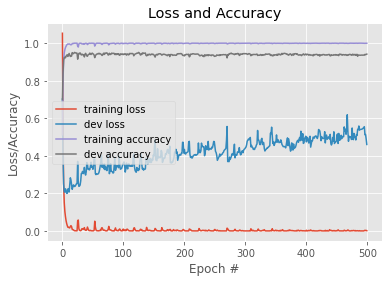

In [16]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =500

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

These results are much better, and the overfitting is alot less than it was. Now next up we are going to drop to 6 epochs as that is where the values are high and stable. We will also increase the dropout coeffecient to reduce the over fitting even more.

Epoch 1/6
219/219 [==============================] - 2s 5ms/step - loss: 1.1367 - accuracy: 0.4545 - val_loss: 0.7875 - val_accuracy: 0.6364
Epoch 2/6
219/219 [==============================] - 1s 4ms/step - loss: 0.5736 - accuracy: 0.7736 - val_loss: 0.3959 - val_accuracy: 0.8582
Epoch 3/6
219/219 [==============================] - 1s 4ms/step - loss: 0.2944 - accuracy: 0.8943 - val_loss: 0.2551 - val_accuracy: 0.9028
Epoch 4/6
219/219 [==============================] - 1s 4ms/step - loss: 0.1859 - accuracy: 0.9350 - val_loss: 0.2021 - val_accuracy: 0.9293
Epoch 5/6
219/219 [==============================] - 1s 4ms/step - loss: 0.1345 - accuracy: 0.9536 - val_loss: 0.2011 - val_accuracy: 0.9268
Epoch 6/6
219/219 [==============================] - 1s 4ms/step - loss: 0.1019 - accuracy: 0.9666 - val_loss: 0.1988 - val_accuracy: 0.9345
Test accuracy
73/73 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.9

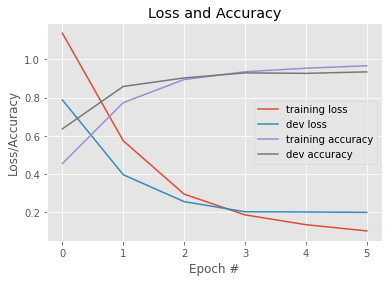

In [17]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.1
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =6

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright that really droped down the over fitting to next to nothing while maintaining 94 percent accuracy, but we should be able to increase the dropout by and 0.1 to see a greater effect

Epoch 1/6
219/219 [==============================] - 2s 6ms/step - loss: 1.2439 - accuracy: 0.3943 - val_loss: 0.8365 - val_accuracy: 0.5709
Epoch 2/6
219/219 [==============================] - 1s 4ms/step - loss: 0.6413 - accuracy: 0.7401 - val_loss: 0.4191 - val_accuracy: 0.8424
Epoch 3/6
219/219 [==============================] - 1s 5ms/step - loss: 0.3359 - accuracy: 0.8802 - val_loss: 0.2592 - val_accuracy: 0.9079
Epoch 4/6
219/219 [==============================] - 1s 5ms/step - loss: 0.2207 - accuracy: 0.9226 - val_loss: 0.2159 - val_accuracy: 0.9259
Epoch 5/6
219/219 [==============================] - 1s 5ms/step - loss: 0.1661 - accuracy: 0.9410 - val_loss: 0.1913 - val_accuracy: 0.9349
Epoch 6/6
219/219 [==============================] - 1s 5ms/step - loss: 0.1388 - accuracy: 0.9520 - val_loss: 0.2007 - val_accuracy: 0.9315
Test accuracy
73/73 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.9

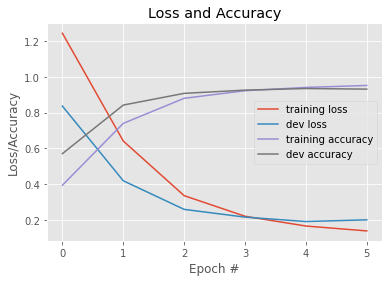

In [18]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =6

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

As we can see here we have basically elimanted the overfitting of the model. Lets see what happens if we add another layer of relu.

Epoch 1/6
219/219 [==============================] - 2s 6ms/step - loss: 1.1118 - accuracy: 0.4358 - val_loss: 0.6696 - val_accuracy: 0.7173
Epoch 2/6
219/219 [==============================] - 1s 5ms/step - loss: 0.6108 - accuracy: 0.7249 - val_loss: 0.4756 - val_accuracy: 0.7846
Epoch 3/6
219/219 [==============================] - 1s 5ms/step - loss: 0.4045 - accuracy: 0.8320 - val_loss: 0.3261 - val_accuracy: 0.8711
Epoch 4/6
219/219 [==============================] - 1s 5ms/step - loss: 0.2566 - accuracy: 0.9009 - val_loss: 0.2439 - val_accuracy: 0.9101
Epoch 5/6
219/219 [==============================] - 1s 5ms/step - loss: 0.1812 - accuracy: 0.9338 - val_loss: 0.2085 - val_accuracy: 0.9225
Epoch 6/6
219/219 [==============================] - 1s 5ms/step - loss: 0.1457 - accuracy: 0.9522 - val_loss: 0.2116 - val_accuracy: 0.9310
Test accuracy
73/73 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.9

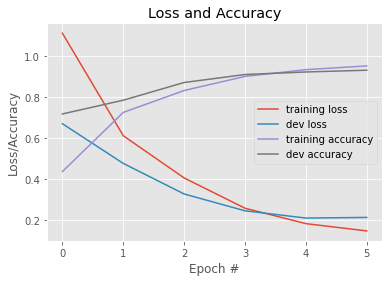

In [19]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =6

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

It seems that at this point adding more layers only servers to increase overfitting So now lets try to decrease the batch size and see if that has a notable effect

Epoch 1/6
876/876 [==============================] - 5s 5ms/step - loss: 0.9021 - accuracy: 0.5613 - val_loss: 0.5229 - val_accuracy: 0.7692
Epoch 2/6
876/876 [==============================] - 4s 5ms/step - loss: 0.4274 - accuracy: 0.8260 - val_loss: 0.2830 - val_accuracy: 0.8994
Epoch 3/6
876/876 [==============================] - 4s 4ms/step - loss: 0.2389 - accuracy: 0.9122 - val_loss: 0.2435 - val_accuracy: 0.9169
Epoch 4/6
876/876 [==============================] - 4s 4ms/step - loss: 0.1808 - accuracy: 0.9385 - val_loss: 0.2466 - val_accuracy: 0.9221
Epoch 5/6
876/876 [==============================] - 4s 4ms/step - loss: 0.1442 - accuracy: 0.9523 - val_loss: 0.2120 - val_accuracy: 0.9302
Epoch 6/6
876/876 [==============================] - 4s 4ms/step - loss: 0.1202 - accuracy: 0.9600 - val_loss: 0.2104 - val_accuracy: 0.9259
Test accuracy
73/73 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.9

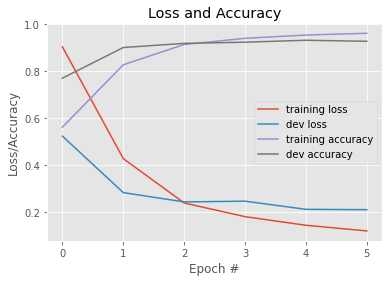

In [20]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =6

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 8, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

After testing with a batch size of both 16 and 8, the size of the batch for this data does not increase the accuracy at all. Although I did get one run that gave me 95 acc, it seems that was more a result of the random weights being initialized at optimal values. So it was not and effect of the change in batch size.


The biggest problem with relu is how it handles negitive values, so fo the next run I am going to try out a 2 hidden layer network of pure elu and see how that compares to the relu version on this data.

Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 1.3828 - accuracy: 0.3327 - val_loss: 1.3809 - val_accuracy: 0.3366
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3514 - accuracy: 0.3607 - val_loss: 1.3239 - val_accuracy: 0.3760
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 1.1846 - accuracy: 0.4545 - val_loss: 1.0581 - val_accuracy: 0.5109
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.9360 - accuracy: 0.5798 - val_loss: 0.8766 - val_accuracy: 0.5991
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 0.7666 - accuracy: 0.6630 - val_loss: 0.7348 - val_accuracy: 0.6690
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.6157 - accuracy: 0.7539 - val_loss: 0.5980 - val_accuracy: 0.7512
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.4691 - accuracy: 0.8271 - val_loss: 0.4958 - val_accuracy: 0.7957

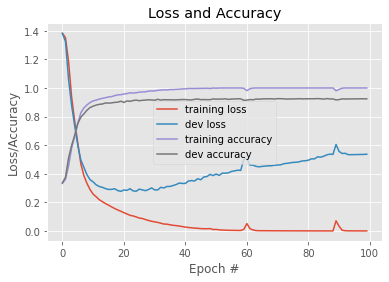

In [21]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'elu'))
model.add(Dense(128, activation = 'elu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

There are a couple of things worth looking at with this one. First lets pull up the images of the small sigmoid network(two layers), and the 2 layer relu functions loss and accuracy graphs.

!["ssig"](sigS.png)
!["relu"](relu.png)








Alright so looking at this, the overitting of elu is much worse than sigmoid, but it seems to build faster. However the reason for using sigmoid at the last layer was to try and tie the train data a bit more. so introducing a layer with a slightly worse overfitting amount, nor reaches its peak acc, as faster is not a reasonable thing to do. Over all I do not believe it would make too much of a difference, but for the sake of proof I will test that.

Epoch 1/50
219/219 [==============================] - 2s 7ms/step - loss: 1.4447 - accuracy: 0.2583 - val_loss: 1.3790 - val_accuracy: 0.2934
Epoch 2/50
219/219 [==============================] - 1s 4ms/step - loss: 1.4039 - accuracy: 0.2968 - val_loss: 1.3639 - val_accuracy: 0.3285
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 1.3618 - accuracy: 0.3291 - val_loss: 1.2984 - val_accuracy: 0.3692
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 1.1830 - accuracy: 0.4389 - val_loss: 1.0320 - val_accuracy: 0.5199
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - loss: 0.9660 - accuracy: 0.5474 - val_loss: 0.8690 - val_accuracy: 0.5919
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 0.8198 - accuracy: 0.6304 - val_loss: 0.7401 - val_accuracy: 0.6882
Epoch 7/50
219/219 [==============================] - 1s 4ms/step - loss: 0.7020 - accuracy: 0.7057 - val_loss: 0.6209 - val_accuracy: 0.7704
Epoch 

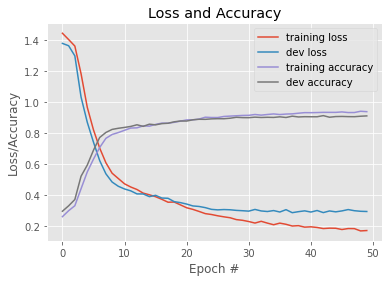

In [22]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'elu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'elu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =50

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

The result I got for trying 2 layers of relu and one elu were not very interesting, But the attempt where I used 2 elu and 1 sigmoid layer, was. The accuracy did not get to the peak as fast, as one might expect from relu. Which after a bit of though mkes sense, if the two layer is slower of course the three layer with sigmoid is slower. As we saw in the initial test run the accuracy was less as well. After completing all of these tests, I believe I can say with confidance that relu,relu,sigmoid with drop give us the best model. Now I will run that model again and try the test data that has been hidden up until this point.

Epoch 1/6
219/219 [==============================] - 2s 7ms/step - loss: 1.1894 - accuracy: 0.4183 - val_loss: 0.7939 - val_accuracy: 0.6201
Epoch 2/6
219/219 [==============================] - 1s 5ms/step - loss: 0.6357 - accuracy: 0.7356 - val_loss: 0.4558 - val_accuracy: 0.8317
Epoch 3/6
219/219 [==============================] - 1s 4ms/step - loss: 0.3740 - accuracy: 0.8602 - val_loss: 0.2809 - val_accuracy: 0.8942
Epoch 4/6
219/219 [==============================] - 1s 5ms/step - loss: 0.2495 - accuracy: 0.9082 - val_loss: 0.2264 - val_accuracy: 0.9208
Epoch 5/6
219/219 [==============================] - 1s 4ms/step - loss: 0.1863 - accuracy: 0.9352 - val_loss: 0.1904 - val_accuracy: 0.9336
Epoch 6/6
219/219 [==============================] - 1s 5ms/step - loss: 0.1453 - accuracy: 0.9505 - val_loss: 0.1724 - val_accuracy: 0.9405
Test accuracy
73/73 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.9

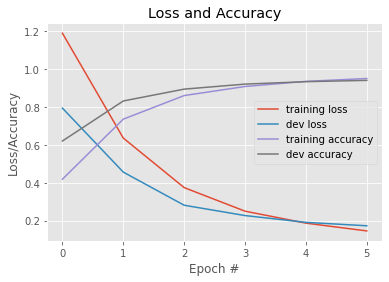

In [23]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =6

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Test accuracy
73/73 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       556
           1       0.96      0.92      0.94       649
           2       0.89      0.90      0.89       544
           3       0.89      0.91      0.90       586

    accuracy                           0.93      2335
   macro avg       0.93      0.93      0.93      2335
weighted avg       0.93      0.93      0.93      2335



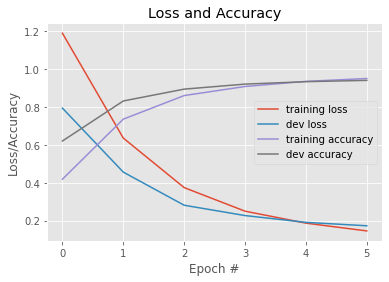

In [24]:

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)
pre = predictedY
# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

[2 2 2 ... 3 2 2]
[2 2 2 ... 3 2 2]


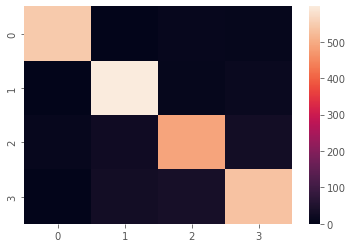

In [25]:
import seaborn as sb
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(predictedY, realY)
temp = [predictedY, realY]
heat_map = sb.heatmap(cf_matrix)
print(predictedY)
print(realY)

plt.show()


#   Conclusions

##  review of what was done

### step 1 Load and setup data
1. We loaded the 4 sperate classes from kraggle
2. Set the labels of the data so that the columns will line up
3. Combine the dataframes
4. Split into test, val, and training sets
5. run the network on orginal data to see what happens
6. normalize the data

### step 2 Deciding on a activation function
1. try relu
2. try sigmoid
3. try tanh
4. look at which activation function had the least overfitting and work on that function
### step 4
panic because you forgot step 3


### step 3
Die on said hill

